
# **Syeda Laiba Azam CS20020**
#**Abdur Rahman      CS20026**
#**Syed Osama Shad   CS20050**

# Speraman Constant

Spearman's rank correlation coefficient is effective in capturing strenght and direction of monotonic relationships between two variables, even if the relationship is not strictly linear. To find relation beween summary having discrete values with features having continuous values this can be used . Tho features have been selected using trial and error based strategy.

In [3]:
import pandas as pd

df = pd.read_csv('cleaned_and_normalized (1).csv')
features = df.drop('Summary', axis=1)
target = df['Summary']
# Calculate Spearman's rank correlation coefficient
spearman_corr = features.corrwith(target, method='spearman')
print("Spearman correlation:\n", spearman_corr)

Spearman correlation:
 Temperature (C)             0.208413
Apparent Temperature (C)    0.198730
Humidity                   -0.201090
Wind Speed (km/h)           0.124288
Wind Bearing (degrees)      0.031032
Visibility (km)             0.224271
Pressure (millibars)       -0.141959
dtype: float64


# Using Heatmap To check multicolinearity

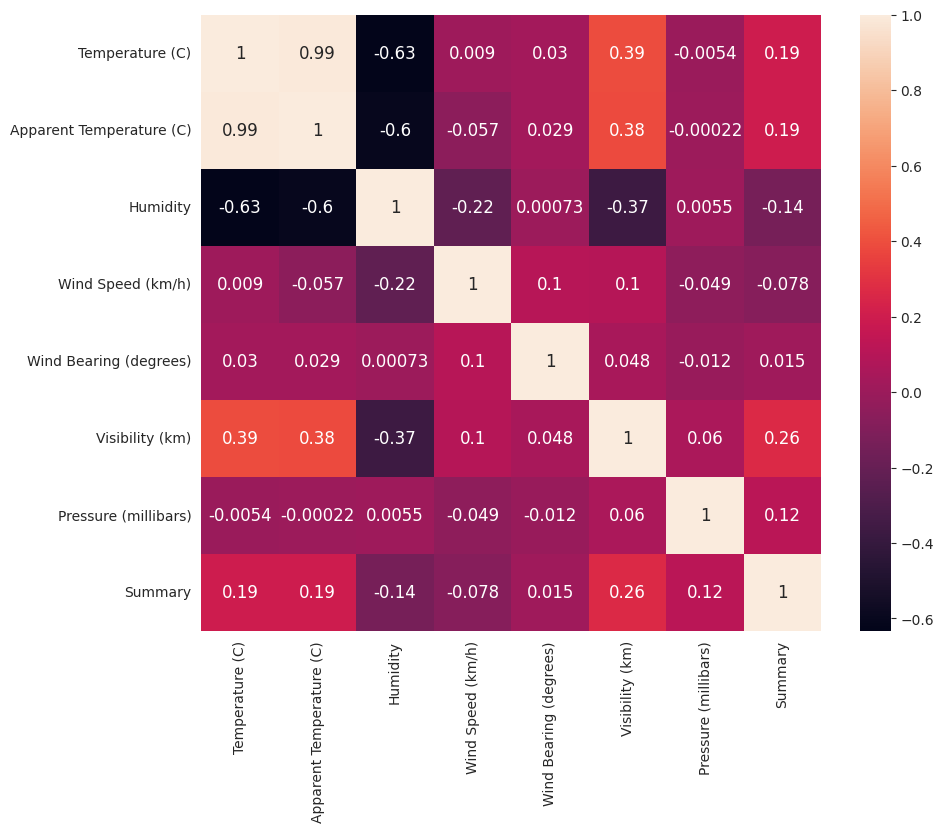

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),  annot=True, annot_kws={"size": 12})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [16]:
df.isnull().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Summary                     0
dtype: int64

In [4]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score,classification_report,make_scorer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Logistic Regression (Best model from it is classifier_log used it for user input prediction)




**Using default parameters Mean Recall: 84.7%**

In [5]:
x=df[["Temperature (C)","Visibility (km)","Wind Speed (km/h)","Humidity"]]


In [6]:
y=df["Summary"]

In [59]:
classifier = LogisticRegression(multi_class='multinomial',max_iter=1000)

# Define the scoring metric (recall in this case)
scorer = make_scorer(recall_score, average='weighted')

# Perform k-fold cross-validation
k = 10# Number of folds
scores = cross_val_score(classifier, x, y, cv=k, scoring=scorer)



# Print the recall scores for each fold
print('Recall scores for each fold:', scores)

# Calculate the mean recall score across all folds
mean_recall_1 = np.mean(scores)
print('Mean Recall:',  (mean_recall_1.round(3))*100)
print(classifier.get_params())

Recall scores for each fold: [0.85030064 0.81764462 0.84770889 0.83649559 0.83970969 0.85857957
 0.83794712 0.8562986  0.86770347 0.86106791]
Mean Recall: 84.7
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


"Breezy"-> 0,"Clear"-> 1,"Cloudy"-> 2,"Rain"-> 3 based on encoded result

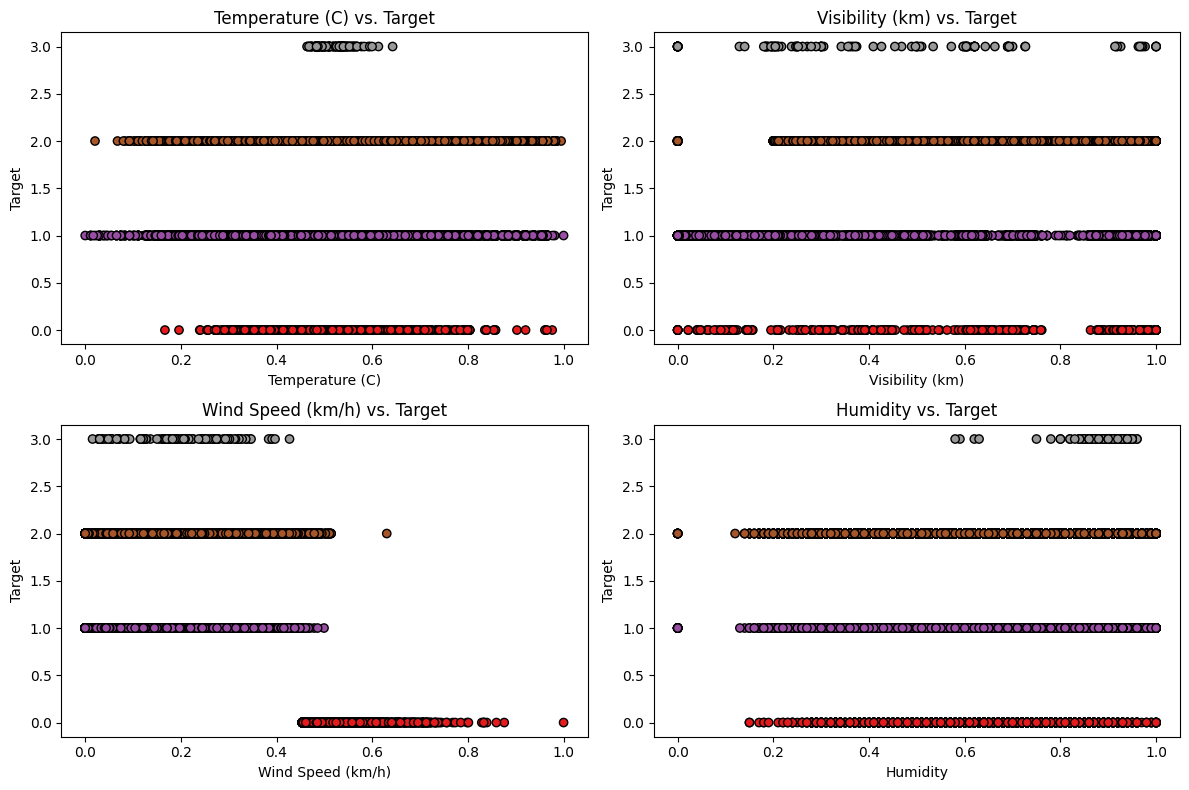

In [ ]:



features = ['Temperature (C)', 'Visibility (km)', 'Wind Speed (km/h)', 'Humidity']

# Create individual subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot each feature against the target variable
for feature, ax in zip(features, axes.flatten()):
    ax.scatter(x[feature], y, c=y, cmap='Set1', edgecolors='k')
    ax.set_xlabel(feature)
    ax.set_ylabel('Target')
    ax.set_title(f'{feature} vs. Target')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


**Using C=10 and solver=liblinear Mean Recall: 85.2%**

In [60]:
classifier = LogisticRegression(max_iter=1000,C=10,solver="liblinear")

# Define the scoring metric (recall in this case)
scorer = make_scorer(recall_score, average='weighted')

# Perform k-fold cross-validation
k = 10  # Number of folds
scores = cross_val_score(classifier, x, y, cv=k, scoring=scorer)

# Print the recall scores for each fold
print('Recall scores for each fold:', scores)

# Calculate the mean recall score across all folds
mean_recall_2 = np.mean(scores)
print('Mean Recall:', (mean_recall_2.round(3))*100)
print(classifier.get_params())

Recall scores for each fold: [0.85123367 0.82334646 0.85195936 0.84416796 0.84696734 0.86469673
 0.84375324 0.85806117 0.87102125 0.86158631]
Mean Recall: 85.2
{'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


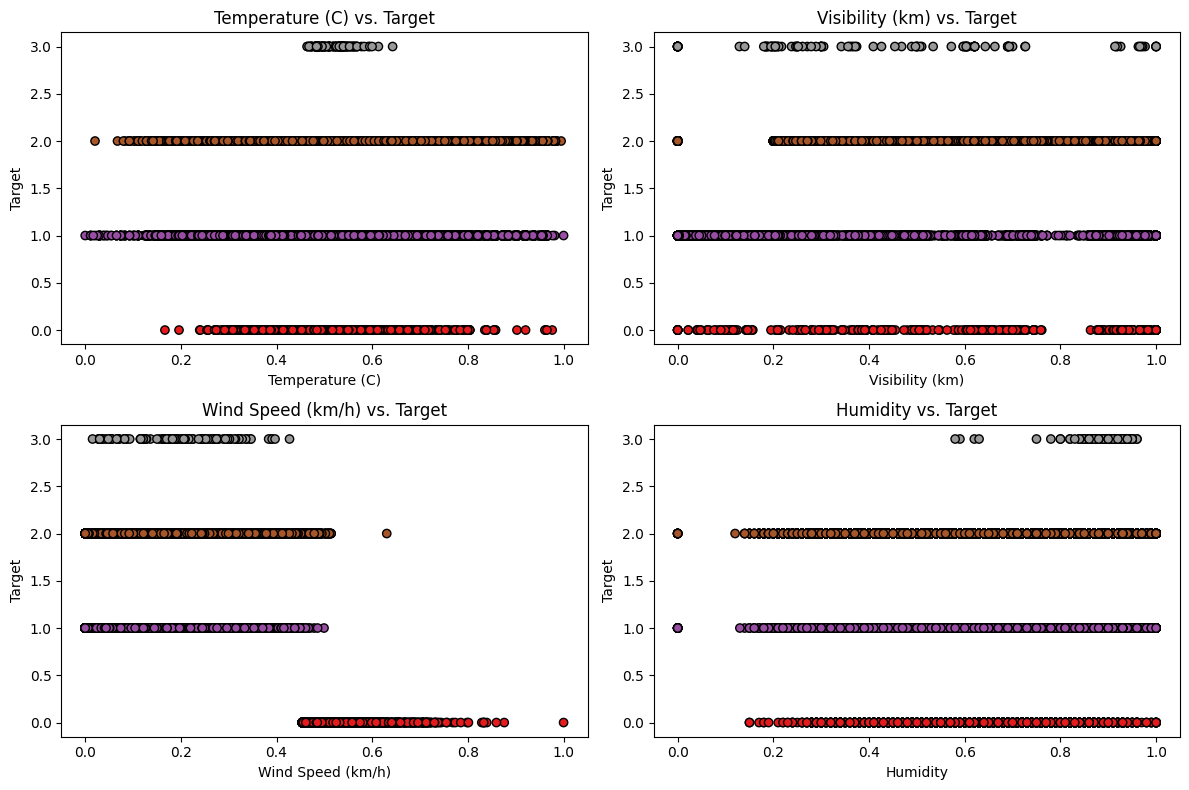

In [ ]:

features = ['Temperature (C)', 'Visibility (km)', 'Wind Speed (km/h)', 'Humidity']

# Create individual subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot each feature against the target variable
for feature, ax in zip(features, axes.flatten()):
    ax.scatter(x[feature], y, c=y, cmap='Set1', edgecolors='k')
    ax.set_xlabel(feature)
    ax.set_ylabel('Target')
    ax.set_title(f'{feature} vs. Target')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**Using  solver=liblinear and penalty is L1 Mean Recall: 85.3%**

In [61]:
classifier_log = LogisticRegression(max_iter=1000,penalty="l1",solver="liblinear")

# Define the scoring metric (recall in this case)
scorer = make_scorer(recall_score, average='weighted')
classifier_log.fit(x,y)

# Perform k-fold cross-validation
k = 10  # Number of folds
scores = cross_val_score(classifier_log, x, y, cv=k, scoring=scorer)

# Print the recall scores for each fold
print('Recall scores for each fold:', scores)

# Calculate the mean recall score across all folds
mean_recall_3 = np.mean(scores)
print('Mean Recall:', (mean_recall_3.round(3))*100)
print(classifier_log.get_params())

Recall scores for each fold: [0.85185569 0.82552353 0.85247771 0.84541213 0.84748574 0.86573354
 0.84510109 0.85992742 0.87330223 0.86376361]
Mean Recall: 85.3
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


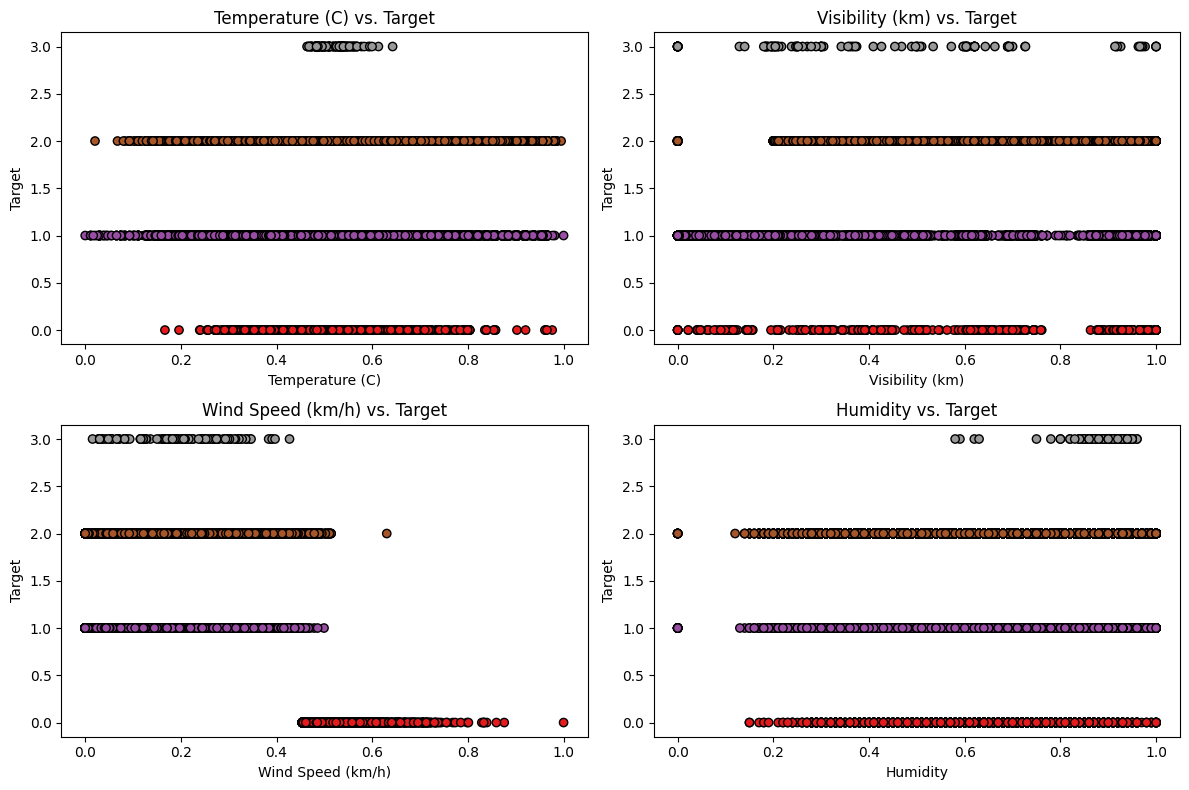

In [ ]:

features = ['Temperature (C)', 'Visibility (km)', 'Wind Speed (km/h)', 'Humidity']

# Create individual subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot each feature against the target variable
for feature, ax in zip(features, axes.flatten()):
    ax.scatter(x[feature], y, c=y, cmap='Set1', edgecolors='k')
    ax.set_xlabel(feature)
    ax.set_ylabel('Target')
    ax.set_title(f'{feature} vs. Target')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

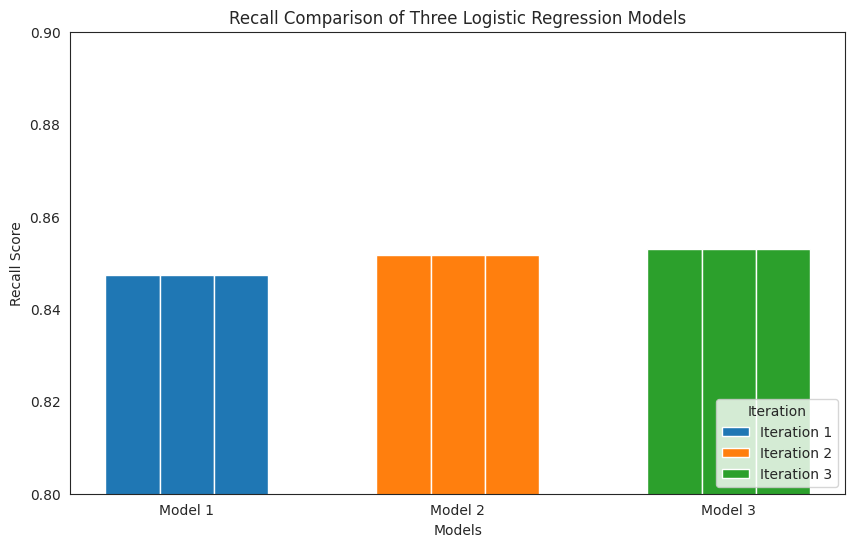

In [63]:



# Create a list of model names and recall scores
model_names = ['Model 1', 'Model 2', 'Model 3']
recall_scores = [mean_recall_1,mean_recall_2,mean_recall_3]

# Create a Matplotlib bar plot
plt.figure(figsize=(10, 6))
for i, recall in enumerate(recall_scores):
    plt.bar([i - 0.2, i, i + 0.2], recall, width=0.2, label=f'Iteration {i+1}')

plt.xticks(range(len(model_names)), model_names)
plt.title('Recall Comparison of Three Logistic Regression Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.legend(title='Iteration', loc='lower right')
plt.ylim(0.8, 0.9)
plt.show()


#RandomForest (Best model from it is classifier_random used it for user input prediction)

**Using n_estimators=500, criterion='entropy', max_features="log2"Mean Recall: 87.2%**

In [7]:


classifier_random = RandomForestClassifier(n_estimators=500, criterion='entropy', max_features="log2")

# Fit the classifier with the training data
classifier_random.fit(x, y)

scorer = make_scorer(recall_score, average='weighted')

k = 10 # Number of folds
scores = cross_val_score(classifier_random, x, y, cv=k, scoring=scorer)

# Calculate the mean recall score across all folds
mean_recall = np.mean(scores)
mean_recall_percent_1 = (mean_recall.round(3)) * 100

# Print the recall scores for each fold
print('Recall scores for each fold:', scores)

# Print the mean recall score
print('Mean Recall:', mean_recall_percent_1)


Recall scores for each fold: [0.86616214 0.84532449 0.86450342 0.87268015 0.88543287 0.8562986
 0.85816485 0.88802488 0.8965267  0.88543287]
Mean Recall: 87.2


**Using max_features="log2" Mean Recall: 86.9%**

In [8]:
classifier = RandomForestClassifier(max_features="log2")

# Define the scoring metric (recall in this case)
scorer = make_scorer(recall_score, average='weighted')

# Perform k-fold cross-validation
k = 10  # Number of folds
scores = cross_val_score(classifier, x, y, cv=k, scoring=scorer)


# Print the recall scores for each fold
print('Recall scores for each fold:', scores)

# Calculate the mean recall score across all folds
mean_recall_2 = np.mean(scores)
print('Mean Recall:', (mean_recall_2.round(3))*100)

print(classifier.get_params())


Recall scores for each fold: [0.86574746 0.84283641 0.86211901 0.86946604 0.8836703  0.8498704
 0.85598756 0.88512182 0.89372732 0.88263349]
Mean Recall: 86.9
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


**Using n_estimators=50, criterion='entropy', max_features="log2" Mean Recall: 86.9%**

In [9]:
classifier = RandomForestClassifier(n_estimators=50,criterion='entropy',max_features="log2")

# Define the scoring metric (recall in this case)
scorer = make_scorer(recall_score, average='weighted')

# Perform k-fold cross-validation
k = 10  # Number of folds
scores = cross_val_score(classifier, x, y, cv=k, scoring=scorer)

# Print the recall scores for each fold
print('Recall scores for each fold:', scores)

# Calculate the mean recall score across all folds
mean_recall_3 = np.mean(scores)
print('Mean Recall:', (mean_recall_3.round(3))*100)

Recall scores for each fold: [0.86429608 0.8435621  0.86056396 0.87019181 0.88356661 0.85163297
 0.85619492 0.88615863 0.89175739 0.88398134]
Mean Recall: 86.9


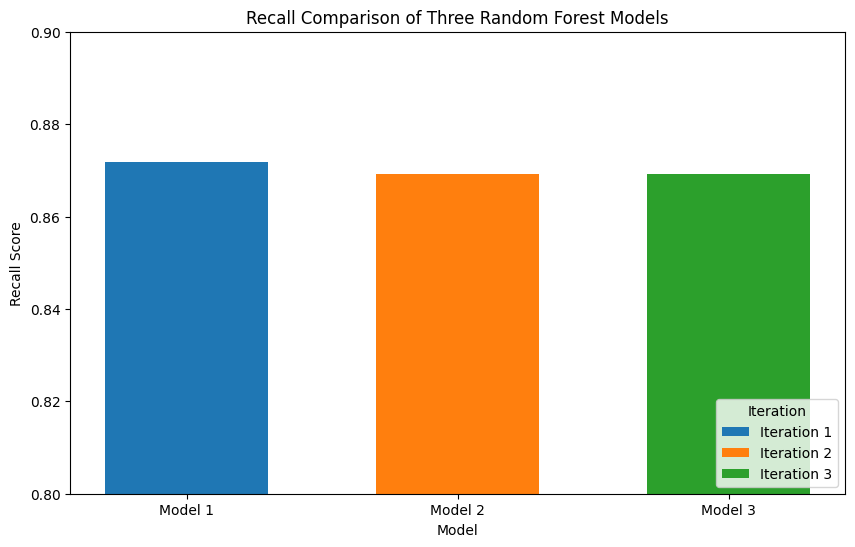

In [10]:


# Create a list of model names and recall scores
model_names = ['Model 1', 'Model 2', 'Model 3']
recall_scores = [mean_recall, mean_recall_2, mean_recall_3]

# Create a Matplotlib bar plot
plt.figure(figsize=(10, 6))
for i, recall in enumerate(recall_scores):
    plt.bar([i - 0.2, i, i + 0.2], recall, width=0.2, label=f'Iteration {i+1}')

plt.xticks(range(len(model_names)), model_names)
plt.title('Recall Comparison of Three Random Forest Models')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.legend(title='Iteration', loc='lower right')
plt.ylim(0.8, 0.9)
plt.show()


# Artificial Neural Network (Best model from it is model_ANN used it for user input prediction)

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

**Using epoch=100,learning_rate=0.01, decay=0.01/100 Accuracy is  0.8802**

In [36]:

# Build the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
op = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=0.01/100)

# Compile the model
model.compile(optimizer=op, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)
loss_values = model.history.history['loss']

acc_values =model.history.history['accuracy']

learning_rate = model.optimizer.lr.numpy()

decay_rate = model.optimizer.decay.numpy()


# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report
report = classification_report(y_test, y_pred_labels)
print(report)


Epoch 1/100
2412/2412 - 9s - loss: 0.5949 - accuracy: 0.7880 - 9s/epoch - 4ms/step
Epoch 2/100
2412/2412 - 5s - loss: 0.5262 - accuracy: 0.8001 - 5s/epoch - 2ms/step
Epoch 3/100
2412/2412 - 5s - loss: 0.5125 - accuracy: 0.8395 - 5s/epoch - 2ms/step
Epoch 4/100
2412/2412 - 5s - loss: 0.5043 - accuracy: 0.8489 - 5s/epoch - 2ms/step
Epoch 5/100
2412/2412 - 5s - loss: 0.4954 - accuracy: 0.8522 - 5s/epoch - 2ms/step
Epoch 6/100
2412/2412 - 5s - loss: 0.4852 - accuracy: 0.8553 - 5s/epoch - 2ms/step
Epoch 7/100
2412/2412 - 5s - loss: 0.4736 - accuracy: 0.8569 - 5s/epoch - 2ms/step
Epoch 8/100
2412/2412 - 5s - loss: 0.4620 - accuracy: 0.8577 - 5s/epoch - 2ms/step
Epoch 9/100
2412/2412 - 4s - loss: 0.4505 - accuracy: 0.8574 - 4s/epoch - 2ms/step
Epoch 10/100
2412/2412 - 5s - loss: 0.4391 - accuracy: 0.8574 - 5s/epoch - 2ms/step
Epoch 11/100
2412/2412 - 5s - loss: 0.4300 - accuracy: 0.8574 - 5s/epoch - 2ms/step
Epoch 12/100
2412/2412 - 5s - loss: 0.4221 - accuracy: 0.8575 - 5s/epoch - 2ms/step
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


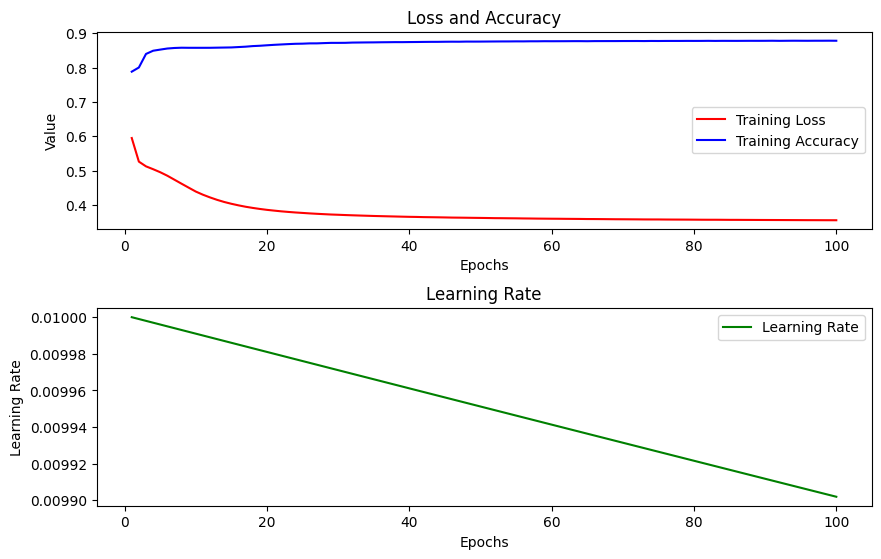

In [38]:
# Create subplots for loss and accuracy

fig, (ax,ax3) = plt.subplots(2,1,figsize=(10, 6))
plt.subplots_adjust(top=0.9, wspace=0.4,hspace=0.4)

# Plot loss function
ax.plot(range(1, len(loss_values) + 1), loss_values, 'r-', label='Training Loss')
ax.plot(range(1, len(acc_values) + 1), acc_values, 'b-', label='Training Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')
ax.set_title('Loss and Accuracy')
ax.legend()

ax3.plot(range(1, len(loss_values) + 1), [learning_rate / (1.0 + decay_rate * epoch) for epoch in range(len(loss_values))], 'g-', label='Learning Rate')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Learning Rate')
ax3.set_title('Learning Rate')
ax3.legend()

# Display the plot
plt.show()


**Using epoch=200,learning_rate=1.0, decay=0.001 Accuracy is  0.8841**

In [39]:
# Build the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
op = tf.keras.optimizers.legacy.SGD(learning_rate=1.0,decay=0.001)
model.compile(optimizer=op, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=30, verbose=2)
loss_values = model.history.history['loss']

acc_values =model.history.history['accuracy']
learning_rate = model.optimizer.lr.numpy()
decay_rate = model.optimizer.decay.numpy()

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report
report = classification_report(y_test, y_pred_labels)
print(report)

Epoch 1/200
2573/2573 - 5s - loss: 0.4166 - accuracy: 0.8537 - 5s/epoch - 2ms/step
Epoch 2/200
2573/2573 - 5s - loss: 0.3551 - accuracy: 0.8791 - 5s/epoch - 2ms/step
Epoch 3/200
2573/2573 - 5s - loss: 0.3477 - accuracy: 0.8812 - 5s/epoch - 2ms/step
Epoch 4/200
2573/2573 - 6s - loss: 0.3448 - accuracy: 0.8822 - 6s/epoch - 2ms/step
Epoch 5/200
2573/2573 - 5s - loss: 0.3428 - accuracy: 0.8826 - 5s/epoch - 2ms/step
Epoch 6/200
2573/2573 - 5s - loss: 0.3416 - accuracy: 0.8831 - 5s/epoch - 2ms/step
Epoch 7/200
2573/2573 - 5s - loss: 0.3406 - accuracy: 0.8834 - 5s/epoch - 2ms/step
Epoch 8/200
2573/2573 - 5s - loss: 0.3401 - accuracy: 0.8835 - 5s/epoch - 2ms/step
Epoch 9/200
2573/2573 - 5s - loss: 0.3396 - accuracy: 0.8836 - 5s/epoch - 2ms/step
Epoch 10/200
2573/2573 - 5s - loss: 0.3392 - accuracy: 0.8835 - 5s/epoch - 2ms/step
Epoch 11/200
2573/2573 - 5s - loss: 0.3388 - accuracy: 0.8839 - 5s/epoch - 2ms/step
Epoch 12/200
2573/2573 - 5s - loss: 0.3384 - accuracy: 0.8839 - 5s/epoch - 2ms/step
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


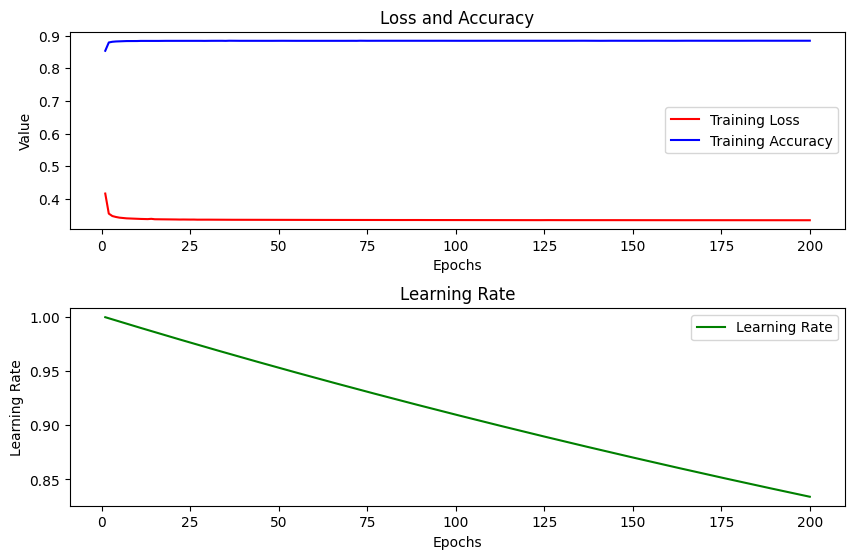

In [40]:

fig, (ax,ax3) = plt.subplots(2,1,figsize=(10, 6))
plt.subplots_adjust(top=0.9, wspace=0.4,hspace=0.4)
# Plot loss function
ax.plot(range(1, len(loss_values) + 1), loss_values, 'r-', label='Training Loss')
ax.plot(range(1, len(acc_values) + 1), acc_values, 'b-', label='Training Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')
ax.set_title('Loss and Accuracy')
ax.legend()

ax3.plot(range(1, len(loss_values) + 1), [learning_rate / (1.0 + decay_rate * epoch) for epoch in range(len(loss_values))], 'g-', label='Learning Rate')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Learning Rate')
ax3.set_title('Learning Rate')
ax3.legend()

# Display the plot
plt.show()



**Using epoch=249,learning_rate=1.0 Accuracy is 0.8691**

In [46]:
# Build the model
model_ANN = Sequential()
model_ANN.add(Dense(16, activation='relu', input_shape=(4,)))
model_ANN.add(Dense(8, activation='relu'))
model_ANN.add(Dense(4, activation='softmax'))
op = tf.keras.optimizers.legacy.SGD(learning_rate=1.0)

# Compile the model
model_ANN.compile(optimizer=op, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_ANN.fit(X_train, y_train, epochs=249, batch_size=32, verbose=2)
loss_values = model_ANN.history.history['loss']

acc_values =model_ANN.history.history['accuracy']
learning_rate = model_ANN.optimizer.lr.numpy()
decay_rate = model_ANN.optimizer.decay.numpy()



# Make predictions on the testing set
y_pred = model_ANN.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)



# Print classification report
report = classification_report(y_test, y_pred_labels)
print(report)


Epoch 1/249
2412/2412 - 5s - loss: 0.4513 - accuracy: 0.8558 - 5s/epoch - 2ms/step
Epoch 2/249
2412/2412 - 5s - loss: 0.3866 - accuracy: 0.8709 - 5s/epoch - 2ms/step
Epoch 3/249
2412/2412 - 6s - loss: 0.3679 - accuracy: 0.8753 - 6s/epoch - 2ms/step
Epoch 4/249
2412/2412 - 5s - loss: 0.3643 - accuracy: 0.8769 - 5s/epoch - 2ms/step
Epoch 5/249
2412/2412 - 8s - loss: 0.3616 - accuracy: 0.8772 - 8s/epoch - 3ms/step
Epoch 6/249
2412/2412 - 5s - loss: 0.3605 - accuracy: 0.8771 - 5s/epoch - 2ms/step
Epoch 7/249
2412/2412 - 5s - loss: 0.3601 - accuracy: 0.8778 - 5s/epoch - 2ms/step
Epoch 8/249
2412/2412 - 5s - loss: 0.3585 - accuracy: 0.8785 - 5s/epoch - 2ms/step
Epoch 9/249
2412/2412 - 4s - loss: 0.3587 - accuracy: 0.8786 - 4s/epoch - 2ms/step
Epoch 10/249
2412/2412 - 5s - loss: 0.3574 - accuracy: 0.8788 - 5s/epoch - 2ms/step
Epoch 11/249
2412/2412 - 4s - loss: 0.3557 - accuracy: 0.8790 - 4s/epoch - 2ms/step
Epoch 12/249
2412/2412 - 5s - loss: 0.3552 - accuracy: 0.8794 - 5s/epoch - 2ms/step
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


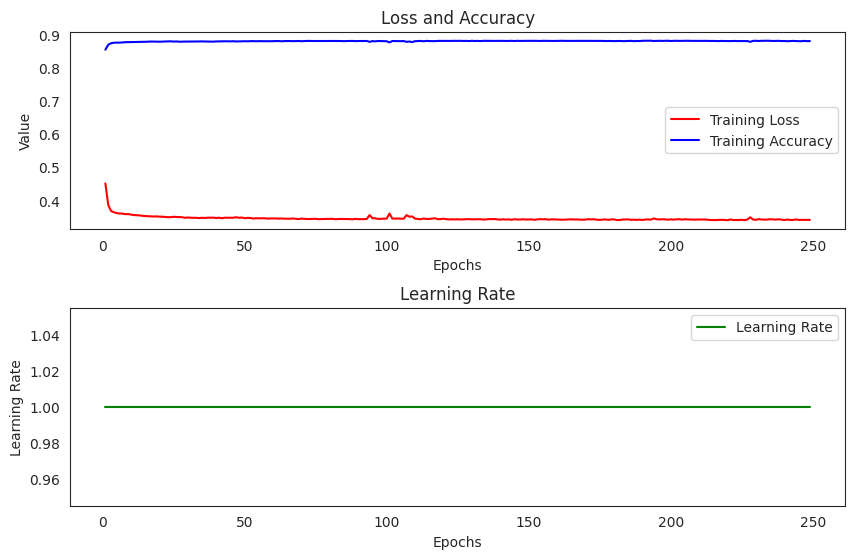

In [47]:
# Create subplots for loss and accuracy

fig, (ax,ax3) = plt.subplots(2,1,figsize=(10, 6))
plt.subplots_adjust(top=0.9, wspace=0.4,hspace=0.4)
# Plot loss function
ax.plot(range(1, len(loss_values) + 1), loss_values, 'r-', label='Training Loss')
ax.plot(range(1, len(acc_values) + 1), acc_values, 'b-', label='Training Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')
ax.set_title('Loss and Accuracy')
ax.legend()

ax3.plot(range(1, len(loss_values) + 1), [learning_rate / (1.0 + decay_rate * epoch) for epoch in range(len(loss_values))], 'g-', label='Learning Rate')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Learning Rate')
ax3.set_title('Learning Rate')
ax3.legend()

# Display the plot
plt.show()

# User Interface

In [48]:
import warnings
# Function to make predictions and display the result
def predict_label(temperature, visibility, wind_speed, humidity):
    # Normalize the input values using the same scaler used during training

    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      input_data = scaler.transform([[temperature, visibility, wind_speed, humidity]])
      predicted_label_log = classifier_log.predict(input_data)[0]
      predicted_label_random = classifier_random.predict(input_data)[0]
      predicted_label_ANN = model_ANN.predict(input_data)[0]
    return predicted_label_random,predicted_label_log,predicted_label_ANN

# Create the input widgets for the user
temperature_widget = widgets.FloatSlider(
    value=0,
    min=-10,
    max=100,
    step=0.1,
    description='Temperature (C):',
    layout={'width': '1000px'}
)

visibility_widget = widgets.FloatSlider(
    value=10,
    min=0,
    max=100,
    step=0.1,
    description='Visibility (km):',
    layout={'width': '1000px'}
)

wind_speed_widget = widgets.FloatSlider(
    value=10,
    min=0,
    max=100,
    step=0.1,
    description='Wind Speed (km/h):',
    layout={'width': '1000px'}
)

humidity_widget = widgets.FloatSlider(
    value=50,
    min=0,
    max=100,
    step=0.1,
    description='Humidity:',
    layout={'width': '1000px'}
)

# Create the output widget to display the predicted label
output_widget = widgets.Output()

# Function to handle the interaction and update the output widget
def update_output(temperature, visibility, wind_speed, humidity):
    with output_widget:
        # Clear the output widget
        output_widget.clear_output()

        # Make predictions based on the input and display the result
        class_mapping = {"Breezy": 0,"Clear": 1,"Cloudy": 2,"Rain": 3}
        predicted_label_random,predicted_label_log,predicted_label_ANN= predict_label(temperature, visibility, wind_speed, humidity)
        predicted_label_log = next(key for key, value in class_mapping.items() if value == predicted_label_log)
        predicted_label_random = next(key for key, value in class_mapping.items() if value == predicted_label_random)
        predicted_label_ANN = np.argmax(predicted_label_ANN)
        predicted_label_ANN = next(key for key, value in class_mapping.items() if value ==predicted_label_ANN)
        print('Predicted Label for logistic Regression:', predicted_label_log)
        print('Predicted Label for Random Forest :', predicted_label_random)
        print('Predicted Label for Arificial Neural Network :', predicted_label_ANN )

# Register the update_output function as the callback for the input widgets
input_widgets = [temperature_widget, visibility_widget, wind_speed_widget, humidity_widget]
for widget in input_widgets:
    widget.observe(lambda change: update_output(
        temperature_widget.value,
        visibility_widget.value,
        wind_speed_widget.value,
        humidity_widget.value
    ), 'value')

scaler = MinMaxScaler()
scaler.fit(x)


scaler.feature_names_ = ["Temperature (C)", "Visibility (km)", "Wind Speed (km/h)", "Humidity"]
classifier_random.feature_names_in_ = ["Temperature (C)", "Visibility (km)", "Wind Speed (km/h)", "Humidity"]
classifier_log.feature_names_in_ = ["Temperature (C)", "Visibility (km)", "Wind Speed (km/h)", "Humidity"]
model_ANN.feature_names_in_ = ["Temperature (C)", "Visibility (km)", "Wind Speed (km/h)", "Humidity"]

# Display the widgets
display(*input_widgets)
display(output_widget)


FloatSlider(value=0.0, description='Temperature (C):', layout=Layout(width='1000px'), min=-10.0)

FloatSlider(value=10.0, description='Visibility (km):', layout=Layout(width='1000px'))

FloatSlider(value=10.0, description='Wind Speed (km/h):', layout=Layout(width='1000px'))

FloatSlider(value=50.0, description='Humidity:', layout=Layout(width='1000px'))

Output()

# Extension Incremental Training using XGBOOST ALOGITHM


# Additional Algorithm Support XGBOOST

XGBOOST is the gradient boasting algoritm it combines previous weak model and form a strong predictive model. Advantage include:


*   High Predictive Accuracy
*   Tell aboute Feature Importance
*   Robust to Overfitting
*   Sensitive to hyperparameter








In [49]:
import xgboost as xgb


# Assuming you have your feature matrix X and target variable y
x=df[["Temperature (C)","Visibility (km)","Wind Speed (km/h)","Humidity"]]
y=df["Summary"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an XGBoost model
classifier_xgb = xgb.XGBClassifier()

# Train the model
classifier_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier_xgb.predict(X_test)

# Evaluate the model
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall.round(3)*100)


import pickle

with open('xgb.pkl', 'wb') as file:
    pickle.dump(classifier_xgb, file)


Recall: 88.7


# Incremental Training of XGBOOST

In [50]:
with open('xgb.pkl', 'rb') as file:
    classifier_xgb = pickle.load(file)

In [51]:
import ipywidgets as widgets


# Create the input widgets for the new data
temperature_widget = widgets.FloatSlider(
    value=0,
    min=-10,
    max=100,
    step=0.1,
    description='Temperature (C):',
    layout={'width': '400px'}
)

humidity_widget = widgets.FloatSlider(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='Humidity:',
    layout={'width': '400px'}
)

wind_speed_widget = widgets.FloatSlider(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='Wind Speed (km/h):',
    layout={'width': '400px'}
)

visibility_widget = widgets.FloatSlider(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='Visibility (km):',
    layout={'width': '400px'}
)


label_widget = widgets.RadioButtons(
    options={'Breezy': 0, 'Clear': 1, 'Cloudy': 2, 'Rain': 3},
    description='Label:',
    layout={'width': '400px'}
)

num_classes = 4

train_button = widgets.Button(description='Train')

output_widget = widgets.Output()

def preprocess_data(temperature, humidity, wind_speed, visibility):
    # Normalize the input values using the same scaler used during training
    input_data = pd.DataFrame({
        'Temperature (C)': [temperature],
        'Visibility (km)': [visibility],
        'Wind Speed (km/h)': [wind_speed],
        'Humidity': [humidity]


    })

    preprocessed_data = scaler.transform(input_data)
    return preprocessed_data


def on_button_click(button):
    # Get the values from the input widgets
    temperature = temperature_widget.value
    humidity = humidity_widget.value
    wind_speed = wind_speed_widget.value
    visibility = visibility_widget.value


    preprocessed_data = preprocess_data(temperature, humidity, wind_speed, visibility)


    selected_label = label_widget.value


    with output_widget:
        output_widget.clear_output()

        print('Training with the new data...')
        le = LabelEncoder()
        y_train = le.fit_transform([selected_label])
        classifier_xgb.set_params(num_class=num_classes)
        classifier_xgb.fit(preprocessed_data,y_train)
        print('Training completed.')


        with open('xgb.pkl', 'wb') as file:
            pickle.dump(classifier_xgb, file)
            print('Updated model saved.')

# Register the button click event
scaler = MinMaxScaler()
scaler.fit(x)
train_button.on_click(on_button_click)

# Display the widgets
display(
    temperature_widget,
    humidity_widget,
    wind_speed_widget,
    visibility_widget,
    label_widget,
    train_button,
    output_widget
)


FloatSlider(value=0.0, description='Temperature (C):', layout=Layout(width='400px'), min=-10.0)

FloatSlider(value=0.0, description='Humidity:', layout=Layout(width='400px'))

FloatSlider(value=0.0, description='Wind Speed (km/h):', layout=Layout(width='400px'))

FloatSlider(value=0.0, description='Visibility (km):', layout=Layout(width='400px'))

RadioButtons(description='Label:', layout=Layout(width='400px'), options={'Breezy': 0, 'Clear': 1, 'Cloudy': 2…

Button(description='Train', style=ButtonStyle())

Output()